In [1]:
!pip install kmeans

In [151]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
import kmeans
sys.path.append('../')
from functions import *
from pandas.plotting import scatter_matrix
import cmath as math

In [109]:
dataList=coojaJsonImporter("./traces")
test1BH1=dataList[0]
test1BH2=dataList[1]
testNorm =dataList[2]
data=[]
cases=["normal",
      "BH1",
        "BH2"
      ]
for nodeList in dataList:
    data.append(createNodes(nodeList))

nodeListNorm=createNodes(testNorm)
nodeListBH1=createNodes(test1BH1)
nodeListBH2=createNodes(test1BH2)
#All data collection is in variable node that is a list of list of nodes
#3 nets input x 9 nodes by net
data[0][0].pkts[1:5] 
columns=[
    "count",
    "label"
]
d={ "label":[],
    "count":[],
    "std":[],
    "mean":[],
    "var": [],
    "25%":[]
}
count=[]
labels=[]
var=[]
#stats=pd.DataFrame(columns=columns)
rows=[count,labels]
for i in range(len(data)):
    for j in range(len(data[i])):
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j]
            name=str(j)+" "+cases[i]
            #print(name)
            #print(node.pkts['pkt'].count())
            #stats["count"]=node.pkts['pkt'].count()
            d["count"].append(data[i][j].pkts['pkt'].count())
            d["std"].append(data[i][j].pkts['pkt'].std())
            d["mean"].append(data[i][j].pkts['pkt'].mean())
            d["var"].append(data[i][j].pkts['pkt'].var())
            d["label"].append(cases[i])
            d["25%"].append(data[i][j].pkts['pkt'].describe()["25%"])
            #var.append(data[i][j].pkts['pkt'].var())
            #stats[name]
            #stats= stats.assign(ip=pd.Series(node.pkts['pkt'].describe()).values)
            #stats.append(node.pkts['pkt'].describe())

            
            
stats=pd.DataFrame(d)            

stats



Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json


,label,count,std,mean,var,25%
0,normal,98,29.287449,49.653061,857.754681,24.25
1,normal,99,28.994256,49.808081,840.666873,25.50
2,normal,91,29.083888,51.835165,845.872527,26.50
3,normal,97,29.075669,50.206186,845.394545,25.00
4,normal,25,15.535658,22.760000,241.356667,14.00
5,normal,20,17.383901,20.900000,302.200000,6.50
6,normal,92,29.732706,50.706522,884.033803,24.75
7,normal,13,13.918720,26.307692,193.730769,15.00
8,normal,88,28.883253,51.602273,834.242294,26.75
9,BH1,95,29.275511,49.663158,857.055543,25.50


In [154]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from sklearn.decomposition import PCA
# scipy
from scipy.cluster.vq import kmeans,vq,whiten
#print(stats["label"])
print(data.shape)
data=stats.drop(["label","25%","mean"],axis=1)

dataC=stats["label"]
data.head()
Y = data[['var']]

X = data[['std']]

(27, 3)


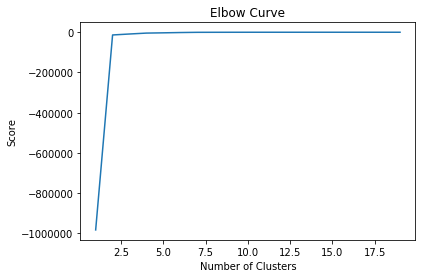

In [152]:
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix

In [141]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
print(labels)



[0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


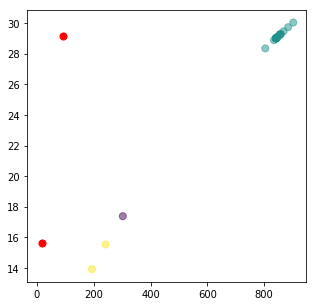

In [158]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)


plt.scatter(data['var'], data['std'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.show()

In [159]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

NameError: name 'digits' is not defined

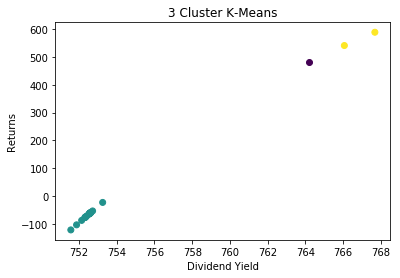

In [157]:
pca = PCA(n_components=1).fit(Y)

pca_d = pca.transform(Y)

pca_c = pca.transform(X)

kmeans=KMeans(n_clusters=3)

kmeansoutput=kmeans.fit(Y)

kmeansoutput

plt.figure('3 Cluster K-Means')

plt.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)

plt.xlabel('Dividend Yield')

plt.ylabel('Returns')

plt.title('3 Cluster K-Means')

plt.show()